# **PRODIGY_ML_01**


## To build a linear regression model to predict the house prices based on their 
##### 1.Square footage
##### 2.Number of bedrooms
##### 3.Number of bathrooms



### **Objective**
From this project you will be able to define multiple linear regression by understanding the problem and business context of using data to predict the house prices. 

### **About the data** 
The House Prices: Advanced Regression Techniques dataset is a popular real estate dataset provided by Kaggle , designed for practicing supervised regression modeling. It contains a wide range of housing attributes and the corresponding sale prices.

**Dataset**
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [100]:
import warnings
warnings.filterwarnings("ignore")


In [101]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1 -> 25.1.1
[notice] To update, run: C:\Users\ardhr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1 -> 25.1.1
[notice] To update, run: C:\Users\ardhr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1 -> 25.1.1
[notice] To update, run: C:\Users\ardhr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1 -> 25.1.1
[notice] To update, run: C:\Users\ardhr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [102]:
# importing necessary libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [103]:
# Import the data sets
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

# Display the number of rows and columns 
print("Test Data :", train_data.shape)
print("Train Data :", test_data.shape)



Test Data : (1460, 81)
Train Data : (1459, 80)


In [104]:
train_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [105]:
train_data.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [106]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [107]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### **Feature Selection**

In [108]:
# find the numeric features
numeric_features = train_data.select_dtypes(include=['number'])
print(numeric_features)


        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       1

In [109]:
corr_matrix = numeric_features.corr()
print(corr_matrix)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [110]:
# find the correlation matrix with the target variable 
saleprice_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

In [111]:
# select the necessary features and group them 
square_footage = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LotArea']
bedrooms = ['BedroomAbvGr', 'TotRmsAbvGrd']
bathrooms = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']

In [112]:
selected_features= square_footage+bedrooms+bathrooms+['SalePrice']
train_df=train_data[selected_features]

### **Data Cleaning**

In [113]:
# to check if any missing values and drop them
train_df.dropna(inplace=True)

In [114]:
# drop the duplicate data if any 
train_df = train_df.drop_duplicates()

### **Exploratory Data Analysis**

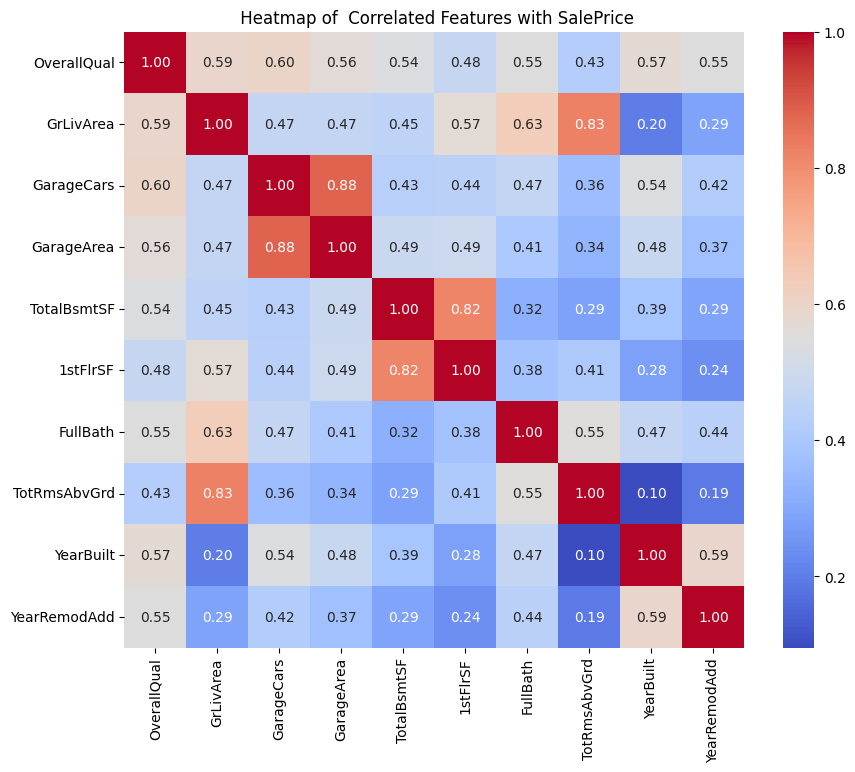

In [115]:
# Heatmap of Numeric Feature Correlation with SalePrice
top_corr_features = saleprice_corr.index[1:11]  # Exclude 'SalePrice' itself
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_features[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title(' Heatmap of  Correlated Features with SalePrice')
plt.show()

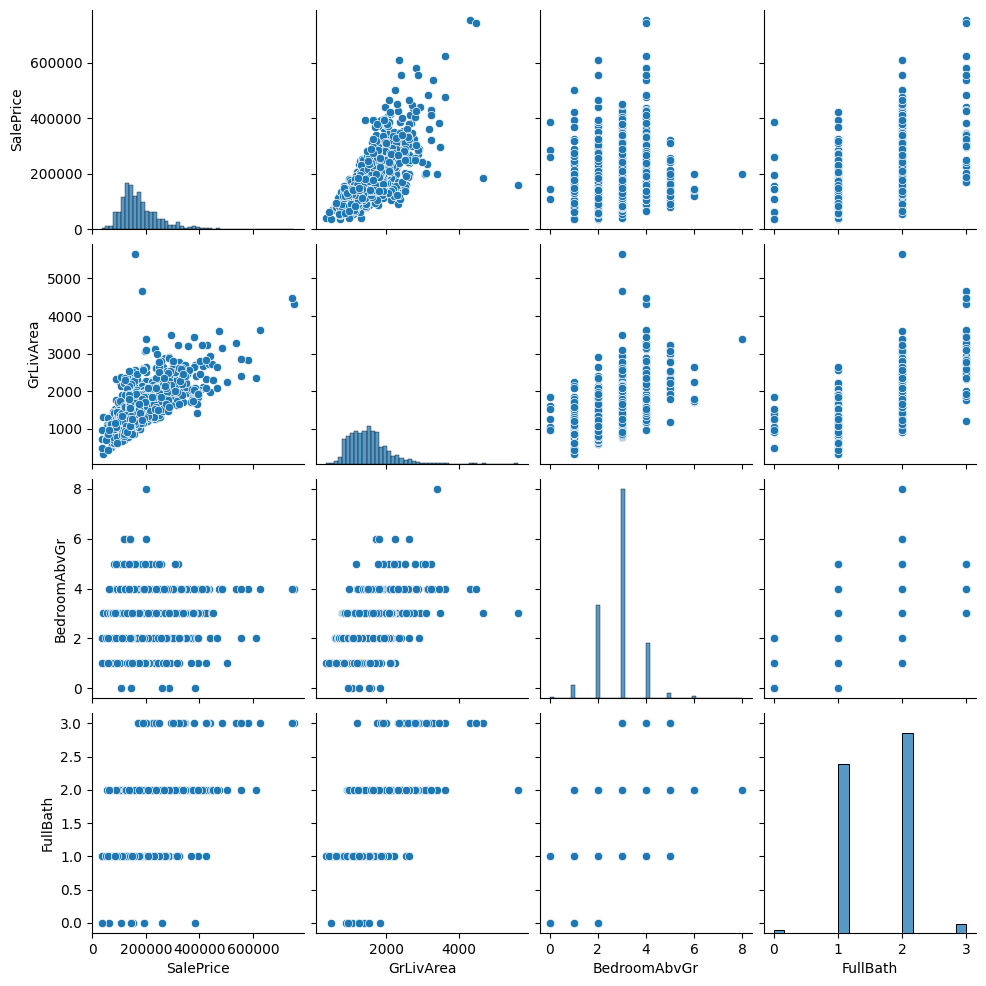

In [116]:
# display the scatter plots of the relationships between the features.
sns.pairplot(train_data[['SalePrice', 'GrLivArea','BedroomAbvGr','FullBath']]) # to reduce the clutterness due to large data set reduce the number of columns
plt.show() 

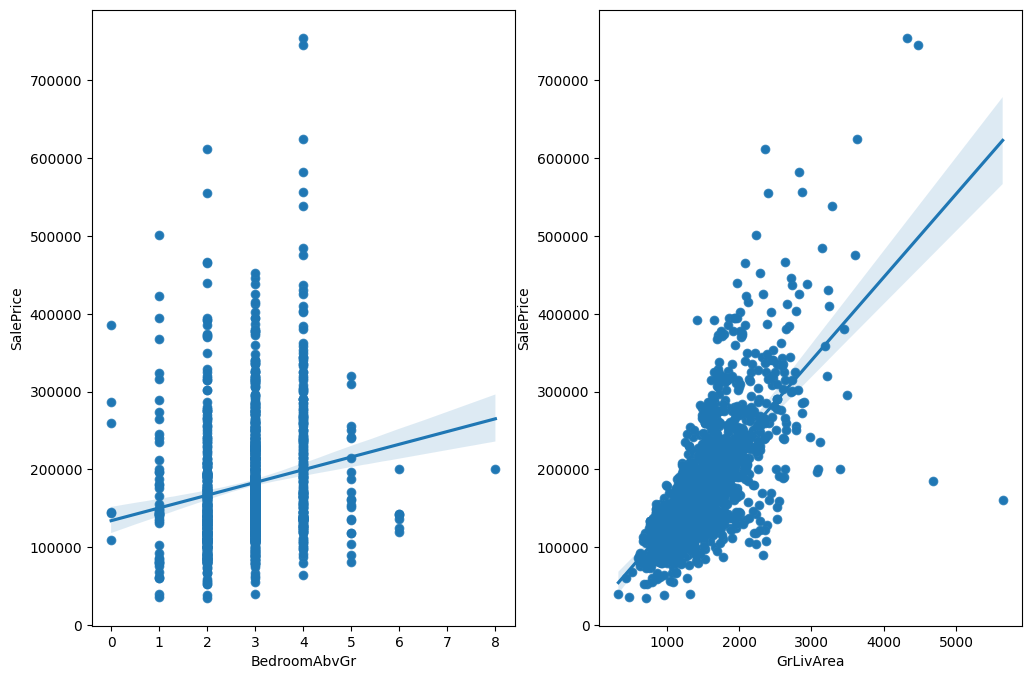

In [117]:
# to find relationship between independent variable and the dependent variable to be linear.
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
sns.scatterplot( x = train_data.BedroomAbvGr, y = train_data.SalePrice,  ax=ax1)
sns.regplot(x=train_data.BedroomAbvGr, y=train_data.SalePrice, ax=ax1)
 
sns.scatterplot(x = train_data.GrLivArea,y = train_data.SalePrice, ax=ax2)
sns.regplot(x=train_data.GrLivArea, y=train_data.SalePrice, ax=ax2);

<Axes: xlabel='FullBath', ylabel='SalePrice'>

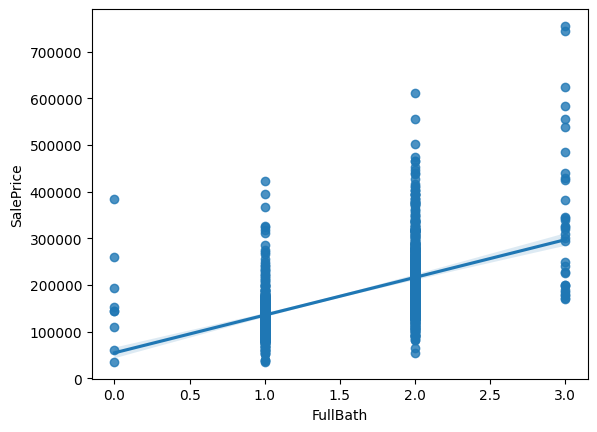

In [118]:
# to see whether there is linear relation between feature and SalePrice
sns.regplot(x=train_data.FullBath, y=train_data.SalePrice, data=train_data)

### **Seperating the features and target columns**
Splitting into X and y

In [119]:
X= train_df.drop('SalePrice',axis=1)
y= train_df['SalePrice']

# the data is already given in kaggle as train data and test data . To show the use of train_test_split , splitting can be done by ,
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### **Standardizing the Data**

In [120]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss

StandardScaler()

In [121]:
X_train =ss.fit_transform(X_train)
X_test =ss.transform(X_test)

### **Training  the Linear Regression Model**

In [122]:
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [123]:
# Evaluating and making predictions on the train data 
y_predict = model.predict(X_train)

In [124]:
# To make prediction for test data 
house_price_predictions = model.predict(X_test)

In [125]:
# Evaluating on the train data 
mse = mean_squared_error(y_train,y_predict)

r2 = r2_score(y_train,y_predict)
print("Mean Squared Error:",mse)
print("R squared:",r2)

Mean Squared Error: 1956825763.6289856
R squared: 0.6951702784397834


In [126]:
# Evaluating on the test data 
mse1 = mean_squared_error(y_test, house_price_predictions)
print("Mean Squared error 1:",mse1)

r2_1 = r2_score(y_test,house_price_predictions)
print("R sqaured 1:",r2_1)

#model.score(X_test,y_test) also gives the same output

Mean Squared error 1: 2217619149.472978
R sqaured 1: 0.6221694289575098


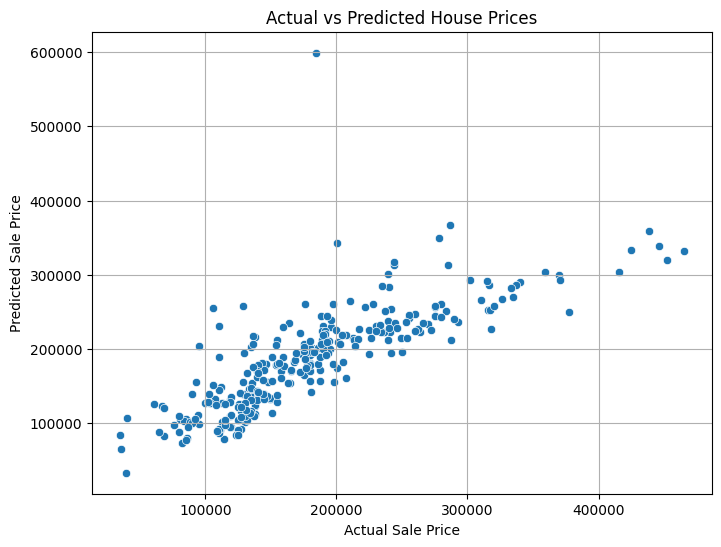

In [127]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=house_price_predictions)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

#### **Coefficients and Interception**

In [128]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ -6673.56632813  21191.14345883  32913.08241735  34513.34023317
   3100.84597543 -19510.69229477   8842.58069395  16457.33307417
   9272.99987374   8464.15114554   2872.65952046]
Intercept: 180897.442159383


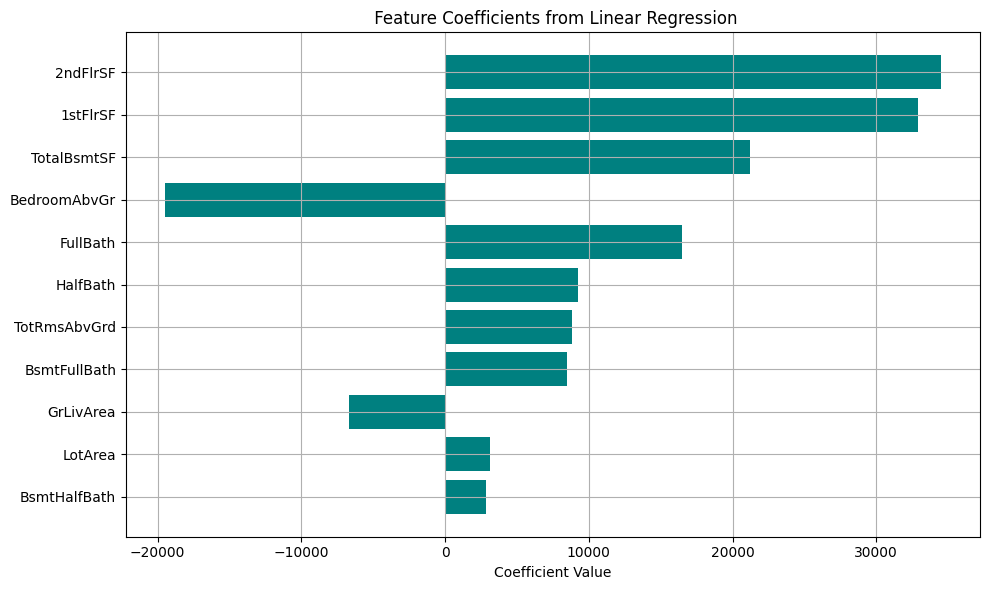

In [129]:
# Bar Plot of Feature Coefficients from the Model
feature_names = X.columns

# Create a DataFrame for coefficients
coeff_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
})

# Sort by absolute value
coeff_df = coeff_df.sort_values(by='Coefficient', key=abs, ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(coeff_df['Feature'], coeff_df['Coefficient'], color='teal')
plt.xlabel('Coefficient Value')
plt.title(' Feature Coefficients from Linear Regression')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

#### **Pipeline**
It is a tool that helps you organize and automate the process of training and evaluating models.

A Pipeline in scikit-learn is like an assembly line:
It lets you chain multiple steps (like scaling, transforming, and modeling) together in one object.
Each step is executed in order — and the output of one step becomes the input of the next.

#### Without pipeline 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

model = LinearRegression()

model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)


#### With Pipeline
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

pipe.fit(X_train, y_train)

predictions = pipe.predict(X_test)


In [130]:
from sklearn.pipeline import Pipeline
steps=[('scaler', StandardScaler()), ('model',  LinearRegression())]
pipe = Pipeline(steps=steps)
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [131]:
# Evaluation on the test data 
house_price_predictions1 = pipe.predict(X_test)
mse2 = mean_squared_error(y_test, house_price_predictions1)
print("Mean_sqaured error :",mse2)
rmse = np.sqrt(mse2)
print("Root mean squared error :",rmse)
r2_2=r2_score(y_test,house_price_predictions1)
print("R squared:",r2_2)

Mean_sqaured error : 2217619149.472978
Root mean squared error : 47091.60381079602
R squared: 0.6221694289575098
